In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics



## Create Logistic Regression Data

In [2]:
np.random.seed(2)

# Number of samples per group
n = 40

# Each class from a different normal distribution
class1 = [i for i in np.random.normal(80, 7, n)]
class2 = [i for i in np.random.normal(50, 10, int(n))]

# coerce data to list
x = class1 + class2

# create labels
y = [1] * n + [0] * int(n)
  
# send data to df
df = pd.DataFrame(list(zip(x, y)), columns=['Temperature', 'Weather'])
df.head()

df = df.sort_values("Temperature")

np.mean(df["Temperature"])

63.59827436750986

Text(0.5, 0, 'Temperature (in Degrees Fahrenheit)')

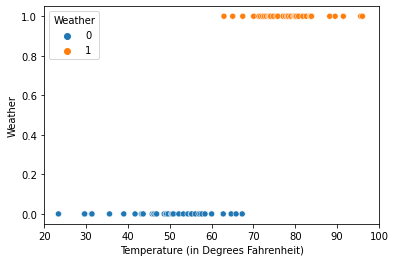

In [3]:
# View scatterplot of data
fig, ax = plt.subplots()
sns.scatterplot(data=df, x="Temperature", y="Weather", hue="Weather")
ax.set_xlim(20, 100)
ax.set_xlabel("Temperature (in Degrees Fahrenheit)")

<AxesSubplot:ylabel='Weather'>

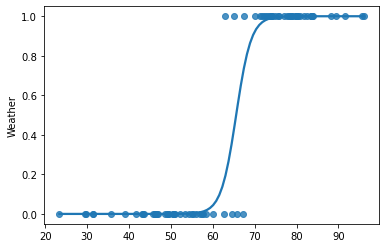

In [4]:
from sklearn.linear_model import LogisticRegression

X = df['Temperature'].values.reshape(-1, 1)
y = df['Weather']


# log_reg_all = LogisticRegression()
# log_reg_all.fit(X, y)

sns.regplot(x=X, y=y, data=df, logistic=True, ci=None)


Log loss:  0.3425027822612878
Coefficient for Temperature:  [[0.84221264]]
Intercept:  [-52.91232643]


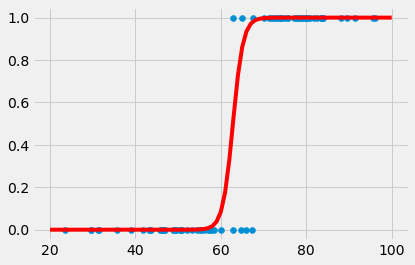

In [13]:
log_reg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)

X_range = 100
Xs = [i for i in range(20, X_range + 1)]
Ys = [log_reg.predict_proba([[value]])[0][1] for value in range(20, X_range + 1)]

plt.scatter(X, y)
plt.plot(Xs, Ys, color='red')

print("Log loss: ", metrics.log_loss(y_test, y_pred_prob))
print("Coefficient for Temperature: ", log_reg.coef_)
print("Intercept: ", log_reg.intercept_)

curve_df = pd.DataFrame({"x": Xs, "y": np.around(Ys, 8)})

curve_df.to_json('curve_df.json', orient='records')

Log loss:  0.07418595503588643
Coefficient for Temperature:  [[0.53481706]]
Intercept:  [-35.06906025]


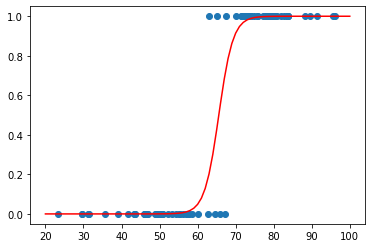

In [6]:
log_reg_all = LogisticRegression()
log_reg_all.fit(X, y)

y_pred_all = log_reg_all.predict(X)
y_pred_prob_all = log_reg_all.predict_proba(X)

X_range = 100
Xs = [i for i in range(20, X_range + 1)]
Ys = [log_reg_all.predict_proba([[value]])[0][1] for value in range(20, X_range + 1)]

plt.scatter(X, y)
plt.plot(Xs, Ys, color='red')

print("Log loss: ", metrics.log_loss(y, y_pred_prob_all))
print("Coefficient for Temperature: ", log_reg_all.coef_)
print("Intercept: ", log_reg_all.intercept_)

## Export data for article

In [7]:
df.to_json('scatterData.json', orient='records')

## Gradient Descent

In [8]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))


In [9]:
class GradientDescentLogisticRegression:
    def __init__(self, learning_rate=0.001, iterations=10000):
        self.learning_rate, self.iterations = learning_rate, iterations
    
    def fit(self, X, y):
        b = -10
        m = 5
        n = X.shape[0]
        for _ in range(self.iterations):
            b_gradient = -1 * np.sum(y - sigmoid(m*X + b)) / n
            m_gradient = -1 * np.sum(X*(y - sigmoid(m*X + b))) / n
            b = b + (self.learning_rate * b_gradient)
            m = m - (self.learning_rate * m_gradient)
        self.m, self.b = m, b
        
    def predict(self, X):
        return 1 / (1 + np.exp(-(self.m*X + self.b)))

m 0.15332767264958935 b -9.735012741390303
Log loss:  13.99420289091238
0.0
13.99420289091238
13.99420289091238


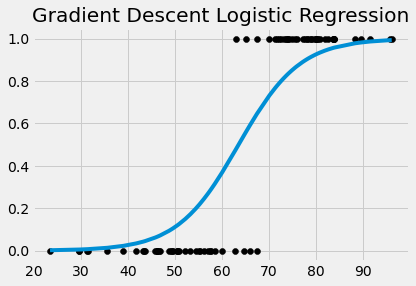

In [10]:
clf = GradientDescentLogisticRegression()
clf.fit(df.Temperature, df.Weather)

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.scatter(df.Temperature, df.Weather, color='black')
plt.plot(df.Temperature, clf.predict(df.Temperature))
plt.gca().set_title("Gradient Descent Logistic Regression")
print('m', clf.m, 'b', clf.b)

print("Log loss: ", metrics.log_loss(df.Weather, clf.predict(df.Temperature), normalize = False))
# print(df.Weather)
print(np.sum(clf.predict(df.Temperature) - sigmoid(clf.m * df.Temperature + clf.b)))

print(np.sum(-1 * (df.Weather * np.log(sigmoid(clf.m * df.Temperature + clf.b)) +
          (1 - df.Weather) *
            np.log(1 - sigmoid(clf.m * df.Temperature + clf.b)))))

print(np.sum(-1 * (df.Weather * np.log(clf.predict(df.Temperature)) +
          (1 - df.Weather) *
            np.log(1 - clf.predict(df.Temperature)))))


## Log-Loss

In [11]:
probs = np.linspace(0.01,0.99,99)
print(probs)

def logLoss(y, prob):
    return (- (y * np.log(prob) + (1 - y) * np.log(1 - prob)))
loss_1 = pd.DataFrame(list(zip(probs, logLoss(1, probs))), columns=['Probability', 'LogLoss'])

print(loss_1)

loss_1.to_json('LogLoss_Y1.json', orient='records')

loss_0 = pd.DataFrame(list(zip(probs, logLoss(0, probs))), columns=['Probability', 'LogLoss'])

print(loss_0)

loss_0.to_json('LogLoss_Y0.json', orient='records')

[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28
 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42
 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56
 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7
 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84
 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98
 0.99]
    Probability   LogLoss
0          0.01  4.605170
1          0.02  3.912023
2          0.03  3.506558
3          0.04  3.218876
4          0.05  2.995732
..          ...       ...
94         0.95  0.051293
95         0.96  0.040822
96         0.97  0.030459
97         0.98  0.020203
98         0.99  0.010050

[99 rows x 2 columns]
    Probability   LogLoss
0          0.01  0.010050
1          0.02  0.020203
2          0.03  0.030459
3          0.04  0.040822
4          0.05  0.051293
..    